# Handy Python Pandas for Handling Outliers

__Data Cleaning & Data Preparation Series — <code> stats.zscore(), plt.boxplot(), np.log()</code>__

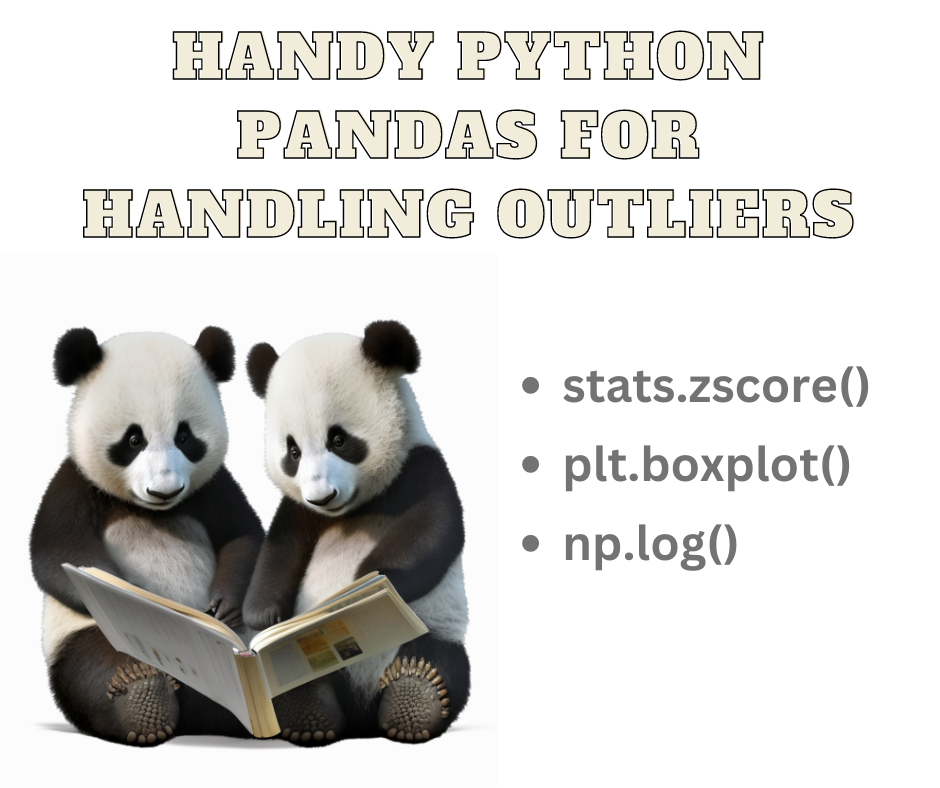

### Table of Contents
### 1. Introduction

### 2. Detecting Outliers

### 3. Handling Outliers

### 1. Introduction

Outliers are extreme values that may significantly affect the data analysis and interpretation. They are data points that are far away from the other data points and can have a significant impact on statistical analysis. Outliers can occur due to measurement errors, data entry errors, or simply due to the natural variability of the data. In this chapter, we will discuss how to handle outliers using the pandas library in Python. In this post, we will be using the AMES House Price data.

### 2. Detecting Outliers
Before we can handle outliers, we need to first detect them. There are various statistical methods for detecting outliers, such as z-score, boxplots, and scatterplots. In pandas, we can use the describe() function to get a summary of the dataset, which includes information on the mean, standard deviation, minimum and maximum values, and quartiles. We can also use the plot() function to generate boxplots and scatterplots.
Let us consider an example where we have a dataset containing the prices of different houses. We can plot the data using a box plot as shown below:

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/learnercares/Python-for-Data-Science/main/AMES%20Housing%20Dataset.csv')


In [11]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,178178.724658
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,71679.018245
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,212925.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,485000.000000


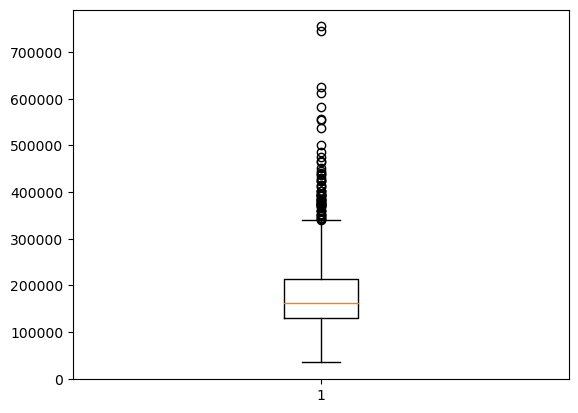

In [13]:
# Create a box plot
plt.boxplot(data['SalePrice'])
plt.show()

### 3. Handling Outliers
Once we have detected the outliers, we need to handle them. There are several ways to handle outliers, including:
#### 3.1 Removing the outliers 

This approach involves removing the outliers from the dataset. However, this can lead to loss of valuable information and bias the analysis. Therefore, we can use other methods such as replacing outliers with a more representative value, such as the mean or median of the data.

In [8]:
from scipy import stats

z_scores = stats.zscore(data['SalePrice'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
new_data = data[filtered_entries]

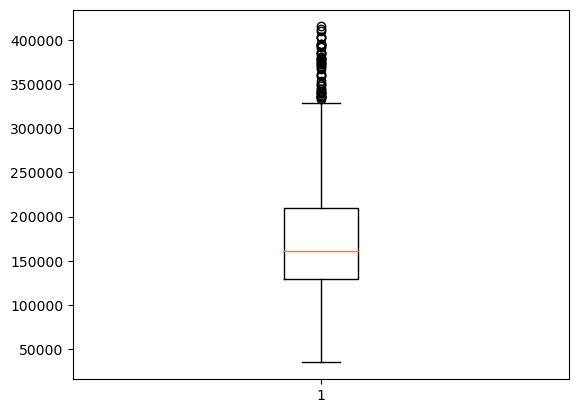

In [9]:
# Create a box plot
plt.boxplot(new_data['SalePrice'])
plt.show()

### 3.2 Transforming the data -

This approach involves transforming the data so that the outliers have less of an impact on the analysis. One way to do this is by applying a log transformation to the data.
The following code applies a log transformation to the data to reduce the impact of the outliers.

In [ ]:
data['SalePrice'] = data['SalePrice'].apply(lambda x: np.log(x) if x > 0 else 0)

### 3.3 Treating outliers as missing values - 
This approach involves treating the outliers as missing values and using imputation techniques to replace them. This can be done using methods such as mean imputation, median imputation, or k-nearest neighbor imputation.

In [10]:
# Replace outliers with median value
median = data['SalePrice'].median()
data.loc[data['SalePrice'] > 500000, 'SalePrice'] = median

In the code above, we replace any price above 500,000 with the median value of the price column.

### Conclusion

Handling outliers is an essential step in data analysis, as they can significantly impact the results. In this post, we discussed how to handle outliers using Pandas. We first identified outliers in the dataset using visualization techniques such as box plots. We then discussed different methods to handle outliers, including replacing outliers with a more representative value or transforming the data. Handling outliers is an essential step in data analysis and can help in improving the accuracy of statistical analysis and machine learning models.

Many thanks for reading this post!🙏.

If you found this content helpful😊, please LIKE 👍, SHARE, and FOLLOW to stay updated on our future posts.